<a class="anchor" id="0"></a>
# **Naive Bayes Classifier in Python**


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization purposes
import seaborn as sns # for statistical data visualization
%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

#import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
  #      print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

In [3]:
import warnings

warnings.filterwarnings('ignore')

# Import dataset  <a class="anchor" id="6"></a>

In [5]:
#Load data set
data = '/content/drive/MyDrive/Colab Notebooks/DataMining/lab08/adult-1.csv'
df = pd.read_csv(data, header=None, sep=',\s')

#  Exploratory data analysis <a class="anchor" id="7"></a>


In [6]:
# view dimensions of dataset
df.shape

(32561, 15)

### View top 5 rows of dataset

In [7]:
# preview the dataset
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### Rename column names

The dataset does not have proper column names. The columns are merely labelled as 0,1,2.... and so on. Give proper names to the columns. I will do it as follows:-

In [8]:
col_names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', 'occupation', 'relationship',
             'race', 'sex', 'capital_gain', 'capital_loss', 'hours_per_week', 'native_country', 'income']

df.columns = col_names
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [9]:
# now preview the dataset again with proper column names
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### View summary of dataset

In [10]:
# view summary of dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


### Types of variables


In this section, I segregate the dataset into categorical and numerical variables. There are a mixture of categorical and numerical variables in the dataset. Categorical variables have data type object. Numerical variables have data type int64.


First of all, I will explore categorical variables.

### Explore categorical variables

In [11]:
# find categorical variables
categorical = [var for var in df.columns if df[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :\n\n', categorical)

There are 9 categorical variables

The categorical variables are :

 ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'income']


In [12]:
# view the categorical variables

df[categorical].head()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K


### Summary of categorical variables


- There are 9 categorical variables.


- The categorical variables are given by `workclass`, `education`, `marital_status`, `occupation`, `relationship`, `race`, `sex`, `native_country` and `income`.


- `income` is the target variable.

### Explore problems within categorical variables


First, explore the categorical variables.


### Missing values in categorical variables

In [13]:
# check missing values in categorical variables

df[categorical].isnull().sum()

workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
native_country    0
income            0
dtype: int64

Any Missing variable? You need to confirm this further.

### Frequency counts of categorical variables


Now, I will check the frequency counts of categorical variables.

In [14]:
# view frequency counts of values in categorical variables

for var in categorical:

    print(df[var].value_counts())

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64
education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: count, dtype: int64
marital_status
Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: count, dtype: int64
occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      

In [15]:
# view frequency distribution of categorical variables
for var in categorical:
    print(df[var].value_counts()/(len(df)))

workclass
Private             0.697030
Self-emp-not-inc    0.078038
Local-gov           0.064279
?                   0.056386
State-gov           0.039864
Self-emp-inc        0.034274
Federal-gov         0.029483
Without-pay         0.000430
Never-worked        0.000215
Name: count, dtype: float64
education
HS-grad         0.322502
Some-college    0.223918
Bachelors       0.164461
Masters         0.052916
Assoc-voc       0.042443
11th            0.036086
Assoc-acdm      0.032769
10th            0.028654
7th-8th         0.019840
Prof-school     0.017690
9th             0.015786
12th            0.013298
Doctorate       0.012684
5th-6th         0.010227
1st-4th         0.005160
Preschool       0.001566
Name: count, dtype: float64
marital_status
Married-civ-spouse       0.459937
Never-married            0.328092
Divorced                 0.136452
Separated                0.031479
Widowed                  0.030497
Married-spouse-absent    0.012837
Married-AF-spouse        0.000706
Name: coun

Is there any missing vaiable?
Now, we can see that there are several variables like `workclass`, `occupation` and `native_country` which contain missing values. Generally, the missing values are coded as `NaN` and python will detect them with the usual command of `df.isnull().sum()`.

However, in this case the missing values are coded as `?`. Python fail to detect these as missing values because it do not consider `?` as missing values. So, I have to replace `?` with `NaN` so that Python can detect these missing values.

I will explore these variables and replace `?` with `NaN`.

### Explore missing  variable and print the numbers of missing values and in which column(s)

In [16]:
# check labels in workclass variable
df.workclass.unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', '?', 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [17]:
# check frequency distribution of values in workclass variable
#value_counts
df.workclass.value_counts()

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

Howmany values encoded as `?` in workclass variable? Replace these `?` with `NaN`.

In [18]:
# replace '?' values in workclass variable with `NaN`
#df['workclass']*****
df['workclass'] = df['workclass'].replace('?', np.nan)

In [20]:
# again check the frequency distribution of values in workclass variable
df.workclass.value_counts()

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

Now, you shooud see that there are no values encoded as `?` in the `workclass` variable.
Now adopt similar approach with `occupation` and `native_country` column.

### Explore occupation variable

In [21]:
# check labels in occupation variable
df.occupation.unique()


array(['Adm-clerical', 'Exec-managerial', 'Handlers-cleaners',
       'Prof-specialty', 'Other-service', 'Sales', 'Craft-repair',
       'Transport-moving', 'Farming-fishing', 'Machine-op-inspct',
       'Tech-support', '?', 'Protective-serv', 'Armed-Forces',
       'Priv-house-serv'], dtype=object)

In [22]:
# check frequency distribution of values in occupation variable

df.occupation.value_counts()

occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: count, dtype: int64

Howmany values encoded as `?` in `occupation` variable?  Replace these `?` with `NaN`.

In [23]:
# replace '?' values in occupation variable with `NaN`

df['occupation']=df['occupation'].replace("?",np.nan)


In [ ]:
# again check the frequency distribution of values in occupation variable

df.occupation.value_counts()

occupation
Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: count, dtype: int64

### Explore native_country variable


In [ ]:
# check labels in native_country variable

df.native_country.unique()


array(['United-States', 'Cuba', 'Jamaica', 'India', '?', 'Mexico',
       'South', 'Puerto-Rico', 'Honduras', 'England', 'Canada', 'Germany',
       'Iran', 'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia',
       'Thailand', 'Ecuador', 'Laos', 'Taiwan', 'Haiti', 'Portugal',
       'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
       'China', 'Japan', 'Yugoslavia', 'Peru',
       'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
       'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary',
       'Holand-Netherlands'], dtype=object)

In [ ]:
# check frequency distribution of values in native_country variable

df.native_country.value_counts()


native_country
United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France       

Howmany values encoded as `?` in `native_country` variable? Replace these `?` with `NaN`.

In [24]:
# replace '?' values in native_country variable with `NaN`

df['native_country'] = df['native_country'].replace('?',np.nan)

In [25]:
# again check the frequency distribution of values in native_country variable

df.native_country.value_counts()

native_country
United-States                 29170
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                           29
Greece       

### Check missing values in categorical variables again

In [26]:
df[categorical].isnull().sum()

workclass         1836
education            0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
native_country     583
income               0
dtype: int64

Now, we can see that `workclass`, `occupation` and `native_country` variable contains missing values.

### Number of labels: cardinality


The number of labels within a categorical variable is known as **cardinality**. A high number of labels within a variable is known as **high cardinality**. High cardinality may pose some serious problems in the machine learning model. So, check for high cardinality.

In [27]:
# check for cardinality in categorical variables
for var in categorical:
    print(var, ' contains ', len(df[var].unique()), ' labels')

workclass  contains  9  labels
education  contains  16  labels
marital_status  contains  7  labels
occupation  contains  15  labels
relationship  contains  6  labels
race  contains  5  labels
sex  contains  2  labels
native_country  contains  42  labels
income  contains  2  labels


We can see that `native_country` column contains relatively large number of labels as compared to other columns. Now check for cardinality after train-test split.

### Explore Numerical Variables

In [28]:
# find numerical variables
numerical = [var for var in df.columns if df[var].dtype!='O']
print('There are {} numerical variables\n'.format(len(numerical)))
print('The numerical variables are :', numerical)

There are 6 numerical variables

The numerical variables are : ['age', 'fnlwgt', 'education_num', 'capital_gain', 'capital_loss', 'hours_per_week']


In [29]:
# view the numerical variables
df[numerical].head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40


### Summary of numerical variables


- There are 6 numerical variables.


- These are given by `age`, `fnlwgt`, `education_num`, `capital_gain`, `capital_loss` and `hours_per_week`.


- All of the numerical variables are of discrete data type.

### Explore problems within numerical variables


Now, we will explore the numerical variables.


### Missing values in numerical variables

In [30]:
# check missing values in numerical variables

df[numerical].isna().sum()

age               0
fnlwgt            0
education_num     0
capital_gain      0
capital_loss      0
hours_per_week    0
dtype: int64

Any missing values?

# Declare feature vector and target variable <a class="anchor" id="8"></a>

In [31]:
X = df.drop(['income'], axis=1)
y = df['income']

# Split data into separate training and test set<a class="anchor" id="9"></a>

In [33]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)


In [34]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((22792, 14), (9769, 14))

# Feature Engineering <a class="anchor" id="10"></a>

**Feature Engineering** is the process of transforming raw data into useful features that help us to understand our model better and increase its predictive power. Here we carry out feature engineering on different types of variables.

Display the categorical and numerical variables again separately.

In [35]:
# check data types in X_train

X_train.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
dtype: object

In [36]:
# display categorical variables

categorical = [col for col in X_train.columns if X_train[col].dtypes == 'O']

categorical

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country']

In [37]:
# display numerical variables

numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']

numerical

['age',
 'fnlwgt',
 'education_num',
 'capital_gain',
 'capital_loss',
 'hours_per_week']

### Engineering missing values in categorical variables

In [40]:
# print percentage of missing values in the categorical variables in training set
X_train[categorical].isnull().mean()

workclass         0.055985
education         0.000000
marital_status    0.000000
occupation        0.056072
relationship      0.000000
race              0.000000
sex               0.000000
native_country    0.018164
dtype: float64

In [41]:
# print categorical variables with missing data

for col in categorical:
    if X_train[col].isnull().mean()>0:
        print(col, (X_train[col].isnull().mean()))

workclass 0.055984555984555984
occupation 0.05607230607230607
native_country 0.018164268164268166


In [42]:
# impute missing categorical variables with most frequent value
for df2 in [X_train, X_test]:
    df2['workclass'].fillna(X_train['workclass'].mode()[0], inplace=True)
    df2['occupation'].fillna(X_train['occupation'].mode()[0], inplace=True)
    df2['native_country'].fillna(X_train['native_country'].mode()[0], inplace=True)

In [43]:
# check missing values in categorical variables in X_train
X_train[categorical].isnull().sum()

workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
native_country    0
dtype: int64

In [44]:
# check missing values in categorical variables in X_test

X_test[categorical].isnull().sum()

workclass         0
education         0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
native_country    0
dtype: int64

As a final check, check for missing values in X_train and X_test.

In [45]:
# check missing values in X_train

X_train.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
dtype: int64

In [46]:
# check missing values in X_test

X_test.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
dtype: int64

### Encode categorical variables

In [47]:
# print categorical variables
categorical

['workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country']

In [48]:
X_train[categorical].head()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country
32098,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States
25206,State-gov,HS-grad,Divorced,Adm-clerical,Unmarried,White,Female,United-States
23491,Private,Some-college,Married-civ-spouse,Sales,Husband,White,Male,United-States
12367,Private,HS-grad,Never-married,Craft-repair,Not-in-family,White,Male,Guatemala
7054,Private,7th-8th,Never-married,Craft-repair,Not-in-family,White,Male,Germany


In [52]:
# import category encoders
!pip install category_encoders
import category_encoders as ce

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.6 MB/s eta 0:00:00


In [53]:
# encode remaining variables with one-hot encoding

encoder = ce.OneHotEncoder(cols=['workclass', 'education', 'marital_status', 'occupation', 'relationship',
                                 'race', 'sex', 'native_country'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [ ]:
X_train.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,fnlwgt,...,native_country_32,native_country_33,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40,native_country_41
32098,45,1,0,0,0,0,0,0,0,170871,...,0,0,0,0,0,0,0,0,0,0
25206,47,0,1,0,0,0,0,0,0,108890,...,0,0,0,0,0,0,0,0,0,0
23491,48,1,0,0,0,0,0,0,0,187505,...,0,0,0,0,0,0,0,0,0,0
12367,29,1,0,0,0,0,0,0,0,145592,...,0,0,0,0,0,0,0,0,0,0
7054,23,1,0,0,0,0,0,0,0,203003,...,0,0,0,0,0,0,0,0,0,0


In [54]:
X_train.shape

(22792, 105)

Explain what happened to the initial 14 columns?

Similarly, I will take a look at the `X_test` set.

In [55]:
X_test.head()

,age,workclass_1,workclass_2,workclass_3,workclass_4,workclass_5,workclass_6,workclass_7,workclass_8,fnlwgt,...,native_country_32,native_country_33,native_country_34,native_country_35,native_country_36,native_country_37,native_country_38,native_country_39,native_country_40,native_country_41
22278,27,1,0,0,0,0,0,0,0,177119,...,0,0,0,0,0,0,0,0,0,0
8950,27,1,0,0,0,0,0,0,0,216481,...,0,0,0,0,0,0,0,0,0,0
7838,25,1,0,0,0,0,0,0,0,256263,...,0,0,0,0,0,0,0,0,0,0
16505,46,1,0,0,0,0,0,0,0,147640,...,0,0,0,0,0,0,0,0,0,0
19140,45,1,0,0,0,0,0,0,0,172822,...,0,0,0,0,0,0,0,0,0,0


In [56]:
X_test.shape

(9769, 105)

`X_train` dataset ready to be fed into the Gaussian Naive Bayes classifier. I will do it as follows.

# Model training<a class="anchor" id="12"></a>

In [58]:
# train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB

# instantiate the model
gnb = GaussianNB()

# fit the model
gnb.fit(X_train, y_train)


GaussianNB()

# Predict the results <a class="anchor" id="13"></a>


In [59]:
y_pred = gnb.predict(X_test)
y_pred

array(['<=50K', '<=50K', '<=50K', ..., '>50K', '<=50K', '<=50K'],
      dtype='<U5')

# **14. Check accuracy score** <a class="anchor" id="14"></a>


In [60]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score: 0.7974


Here, **y_test** are the true class labels and **y_pred** are the predicted class labels in the test-set.

### Compare the train-set and test-set accuracy


Now, I will compare the train-set and test-set accuracy to check for overfitting.

In [61]:
y_pred_train = gnb.predict(X_train)

y_pred_train

array(['>50K', '<=50K', '<=50K', ..., '<=50K', '>50K', '<=50K'],
      dtype='<U5')

In [ ]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.7939


### Check for overfitting and underfitting

In [62]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(gnb.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(gnb.score(X_test, y_test)))

Training set score: 0.7939
Test set score: 0.7974


Explain your results and is there any sign of overfitting?


In [63]:
# check class distribution in test set

y_test.value_counts()

income
<=50K    7407
>50K     2362
Name: count, dtype: int64

We can see that the occurences of most frequent class is 7407. So, we can calculate null accuracy by dividing 7407 by total number of occurences.

In [64]:
# check null accuracy score

null_accuracy = (7407/(7407+2362))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.7582


# Confusion matrix<a class="anchor" id="15"></a>

In [66]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)


Confusion matrix

 [[7041  366]
 [1613  749]]


The confusion matrix shows `5999 + 1897 = 7896 correct predictions` and `1408 + 465 = 1873 incorrect predictions`.


In this case, we have


- `True Positives` (Actual Positive:1 and Predict Positive:1) - 5999


- `True Negatives` (Actual Negative:0 and Predict Negative:0) - 1897


- `False Positives` (Actual Negative:0 but Predict Positive:1) - 1408 `(Type I error)`


- `False Negatives` (Actual Positive:1 but Predict Negative:0) - 465 `(Type II error)`

Text(50.722222222222214, 0.5, 'True Labels')

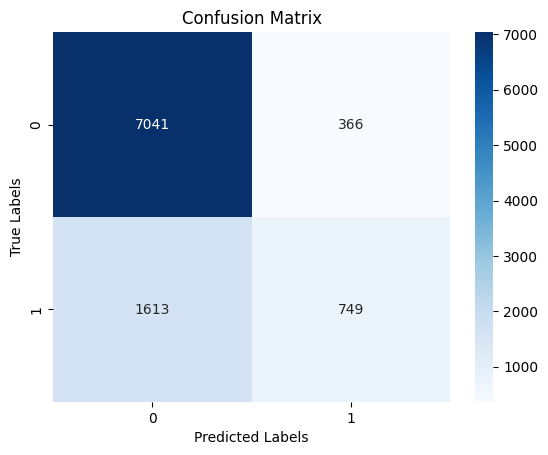

In [67]:
# visualize confusion matrix with seaborn heatmap


# Optionally, you can visualize the confusion matrix with seaborn
ax = sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')


Classification metrices** <a class="anchor" id="16"></a>


### Classification Report
print the classification report

In [68]:
from sklearn.metrics import classification_report

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Classification Report:\n", report)

Accuracy: 0.7974204115057836
Classification Report:
               precision    recall  f1-score   support

       <=50K       0.81      0.95      0.88      7407
        >50K       0.67      0.32      0.43      2362

    accuracy                           0.80      9769
   macro avg       0.74      0.63      0.65      9769
weighted avg       0.78      0.80      0.77      9769



### Classification accuracy
Explain your results